# Lorenz system

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from __future__ import division
%matplotlib notebook

In [31]:
# function to help plot 2D solutions of continuous Dynamical Systems

def Multi3DPlot(F,IC,dt=0.001,t_max=10,alpha=0.5):
    """
    Returns the numerically integrated (euler method) solutions of 2D dX/dt = F(X) for all initial conditions in list IC.
    F must be a R^2-->R^2 vector field of the form dx,dy = F(x,y).
    """
    num_steps = int(t_max/dt)
    Traj = []
    for ic in IC:
        traj = np.ndarray([num_steps,3],dtype=float) #container for solution
        traj[0,0], traj[0,1], traj[0,2] = ic[0], ic[1], ic[2]
        
        for t in range(1,num_steps):
            traj[t,:] = traj[t-1,:]+dt*F(traj[t-1,:])            
        Traj.append(traj)
    
    # plot
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    for traj in Traj:
        ax.plot3D(traj[:,0], traj[:,1],traj[:,2],alpha=alpha)
        ax.plot3D(traj[:1,0], traj[:1,1],traj[:1,2],'k.')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')



<IPython.core.display.Javascript object>


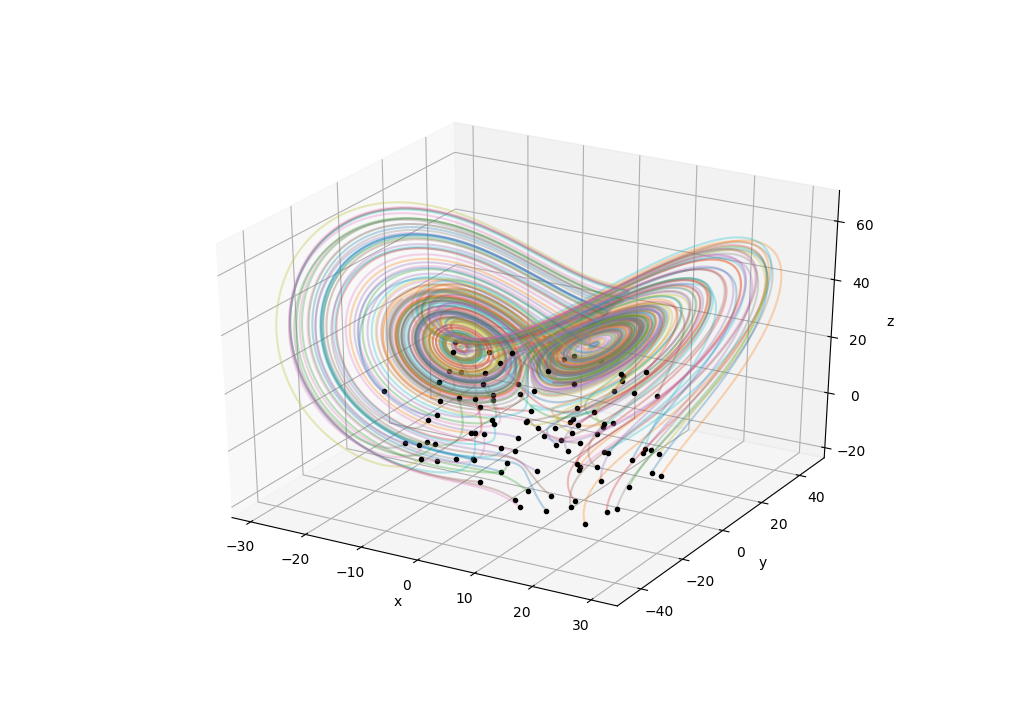

In [43]:
# 3D plot (Lorenz system example)

# Lorenz System
def Lorenz(X,a,b,c):
    dX = np.ndarray(X.shape)
    dX[0] = a*(X[1]-X[0])
    dX[1] = X[0]*(b-X[2])-X[1] 
    dX[2] = X[0]*X[1]-c*X[2]
    return dX


a,b,c = 10, 28, 8/3
t_max = 2.01
F = lambda X: Lorenz(X,a,b,c)
IC = np.random.uniform(-20,20,size=(100,3))
# IC=[[20,20,20]]
Multi3DPlot(F,IC,t_max=t_max,alpha=0.3)

# # Integrate Lorenz trajectory
# dt = 0.001
# t_max = 30
# a,b,c = 10, 28, 8/3
# X0 = np.array([1,1,1])
# num_steps = int(t_max/dt)
# Xtraj = np.zeros([num_steps,3],dtype=float)
# Xtraj[0,:] = X0
# F = lambda X: Lorenz(X,a,b,c)
# for t in range(1,num_steps):
#     Xtraj[t,:] = Xtraj[t-1,:]+dt*F(Xtraj[t-1,:])
    
# # Plot trajectory
# fig = plt.figure()
# ax = plt.axes(projection='3d')
# # ax.plot3D(Xtraj[:,0], Xtraj[:,1],Xtraj[:,2], 'blue')
# ax.plot3D(Xtraj[:1,0], Xtraj[:1,1],Xtraj[:1,2], '.k')
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z')